In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import Birch,KMeans
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
df = pd.read_csv("in_dataset3.csv")
df['Dates']  = pd.to_datetime(df['Dates'])
print(df.shape)
df.head(2)

(443, 23)


,Dates,NAPMPMI Index,NAPMPMI_percent_change,USTBTOT Index,USTBTOT_percent_change,ADP CHNG Index,ADP_CHNG_percent_change,Initial Jobless Claims,Jobless_Percent_Change,Non Farm Payroll,...,University of Michigan Confidence,Confidence_Percent_Change,GDP QOQ Index,GDP_Percent_Change,CPDR9AFC Index,NYRPROWT Index,FEDL01 Index,CPDR9AFC_Percent_Change,NYRPROWT_Percent_Change,FEDL01_percent_change
0,1983-02-28,54.4,NaN,NaN,NaN,NaN,NaN,481,NaN,-73,...,74.6,NaN,NaN,NaN,NaN,NaN,8.51,NaN,NaN,NaN
1,1983-03-31,53.9,-0.009191,NaN,#VALUE!,NaN,#VALUE!,481,0.0,173,...,80.8,0.08311,5.4,NaN,NaN,NaN,8.77,#VALUE!,#VALUE!,0.030552


In [3]:
df2 = df[['Dates','NAPMPMI Index','Initial Jobless Claims', 'Non Farm Payroll', 'Labor Force Participation Index',
          'University of Michigan Confidence', 'GDP QOQ Index', 'FEDL01 Index']]
df2 = df2[1:]
df2.reset_index(inplace = True)
df2.drop('index', inplace=True, axis=1)
df2.head(2)

,Dates,NAPMPMI Index,Initial Jobless Claims,Non Farm Payroll,Labor Force Participation Index,University of Michigan Confidence,GDP QOQ Index,FEDL01 Index
0,1983-03-31,53.9,481,173,63.7,80.8,5.4,8.77
1,1983-04-30,54.2,490,274,63.8,89.1,5.4,8.80


### Cluster Non Farm Payroll Only

In [4]:
nfp = df2[['Dates', 'Non Farm Payroll']]
nfp.head()

,Dates,Non Farm Payroll
0,1983-03-31,173
1,1983-04-30,274
2,1983-05-31,280
3,1983-06-30,377
4,1983-07-31,416


In [5]:
X = nfp.drop('Dates', axis = 1)
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)
X_scaled[:3]

array([[0.50806871],
       [0.5606455 ],
       [0.56376887]])

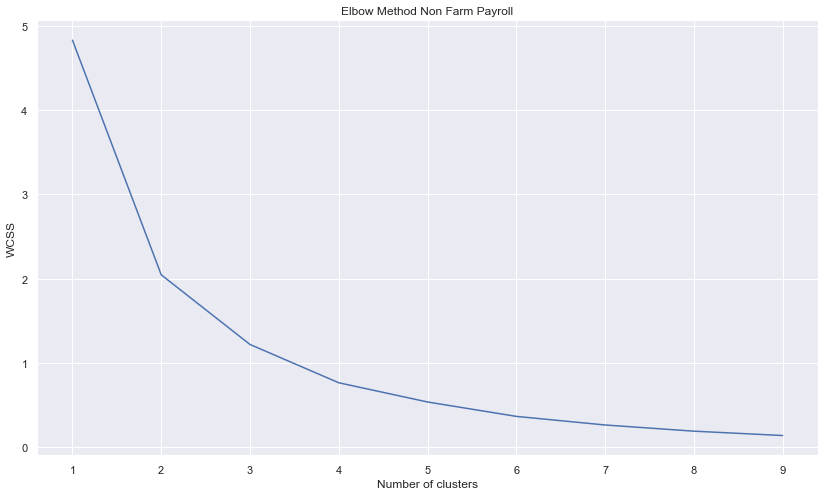

In [6]:
wcss = []
sns.set()
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,8))
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method Non Farm Payroll')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred = kmeans2.fit_predict(X_scaled)
nfp['label'] = pred
score3 = silhouette_score(X_scaled, pred, metric='euclidean', random_state = 0)
print('Silhouette:',score3)

Silhouette: 0.5254208455087063


In [8]:
# range of clusters
nfp.drop('Dates',axis=1).groupby('label').agg(['max', 'min'])

Non Farm Payroll     
                   max  min
label                      
0                 1118  230
1                   21 -344
2                  229   25
3                 -460 -803

(array([-1000.,  -750.,  -500.,  -250.,     0.,   250.,   500.,   750.,
         1000.,  1250.]), <a list of 10 Text yticklabel objects>)

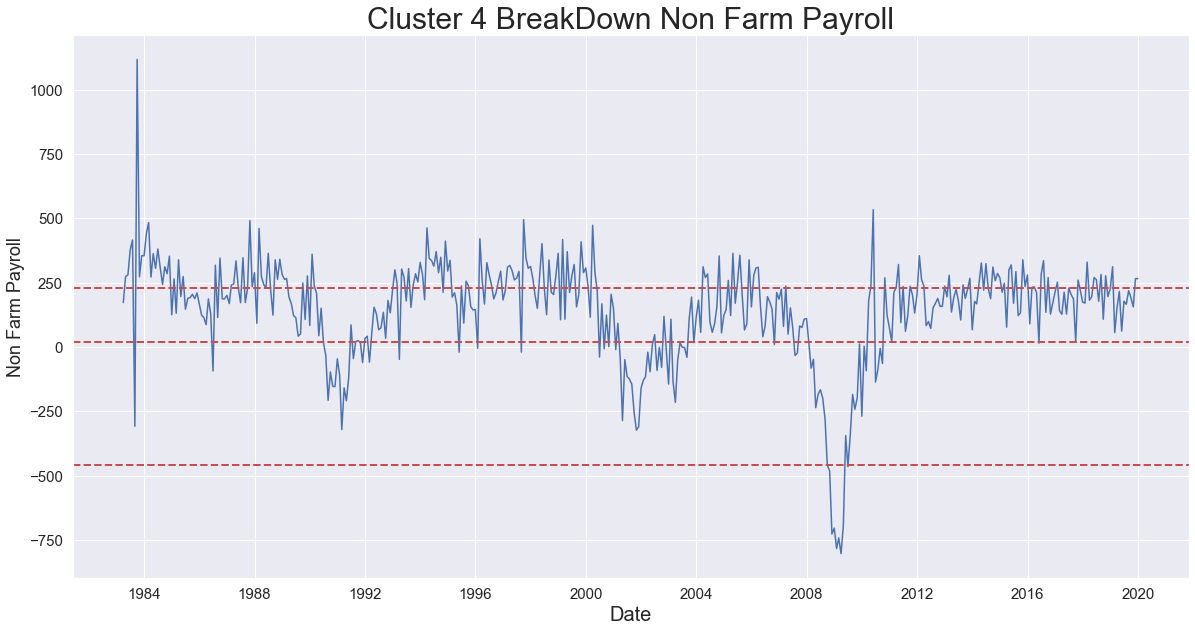

In [9]:
plt.figure(figsize = (20,10))
plt.plot(nfp['Dates'], nfp['Non Farm Payroll'])
plt.axhline(-460, color='r', linestyle='--',lw =2)
plt.axhline(21, color='r', linestyle='--',lw =2)
plt.axhline(229, color='r', linestyle='--',lw =2)
plt.title('Cluster 4 BreakDown Non Farm Payroll', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Non Farm Payroll', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### Cluster 3

In [10]:
kmeans2 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred3 = kmeans2.fit_predict(X_scaled)
nfp['label_3'] = pred3
score = silhouette_score(X_scaled, pred3, metric='euclidean', random_state = 0)
print('Silhouette:',score)

Silhouette: 0.5460766750311384


In [11]:
# range of clusters
nfp.drop(['Dates', 'label'],axis=1).groupby('label_3').agg(['max', 'min'])

Non Farm Payroll     
                     max  min
label_3                      
0                    147 -166
1                   1118  150
2                   -184 -803

(array([-1000.,  -750.,  -500.,  -250.,     0.,   250.,   500.,   750.,
         1000.,  1250.]), <a list of 10 Text yticklabel objects>)

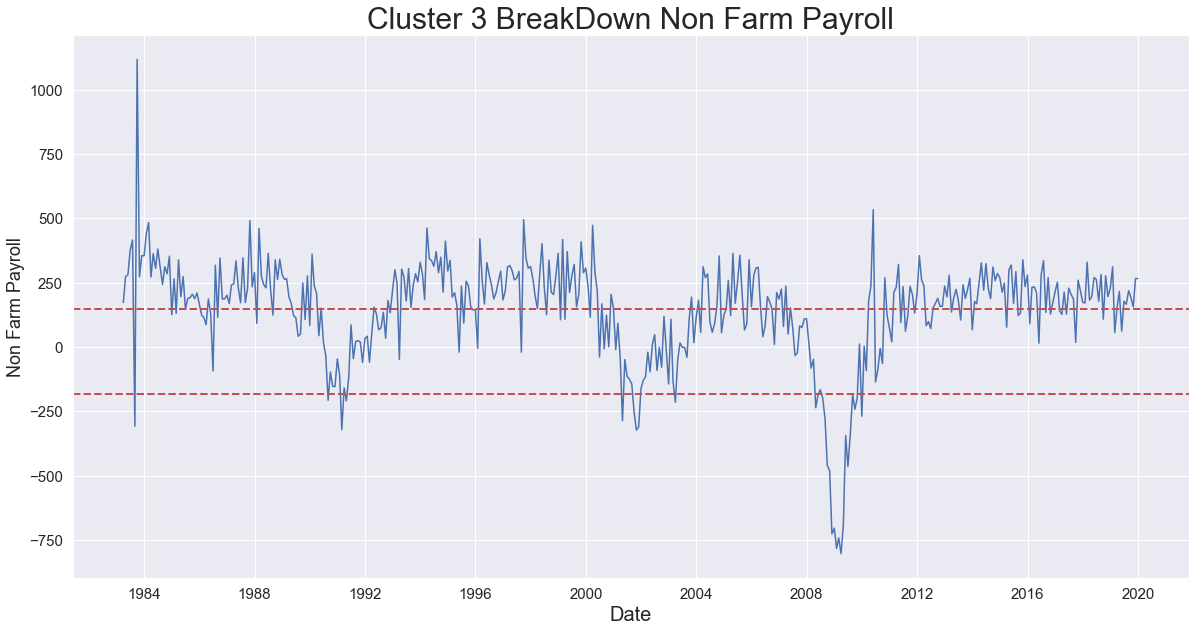

In [12]:
plt.figure(figsize = (20,10))
plt.plot(nfp['Dates'], nfp['Non Farm Payroll'])
plt.axhline(-184, color='r', linestyle='--',lw =2)
plt.axhline(147, color='r', linestyle='--',lw =2)
plt.title('Cluster 3 BreakDown Non Farm Payroll', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Non Farm Payroll', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### Clustering University of Michigan Confidence Only

In [13]:
mic = df2[['Dates', 'University of Michigan Confidence']]
mic.head()

,Dates,University of Michigan Confidence
0,1983-03-31,80.8
1,1983-04-30,89.1
2,1983-05-31,93.3
3,1983-06-30,92.2
4,1983-07-31,92.8


In [14]:
X2 = mic.drop('Dates', axis = 1)
sc = MinMaxScaler()
X_scaled2 = sc.fit_transform(X2)
X_scaled2[:3]

array([[0.44973545],
       [0.59611993],
       [0.670194  ]])

In [15]:
kmeans3 = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred2 = kmeans3.fit_predict(X_scaled2)
mic['label_4'] = pred2
score = silhouette_score(X_scaled2, pred2, metric='euclidean', random_state = 0)
print('Silhouette:',score)

Silhouette: 0.5667344560841637


In [16]:
### range of clusters
mic.drop('Dates',axis=1).groupby('label_4').agg(['max', 'min'])

University of Michigan Confidence      
                                      max   min
label_4                                        
0                                    97.7  85.9
1                                   112.0  97.9
2                                    71.6  55.3
3                                    85.6  72.2

(array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120.]),
 <a list of 8 Text yticklabel objects>)

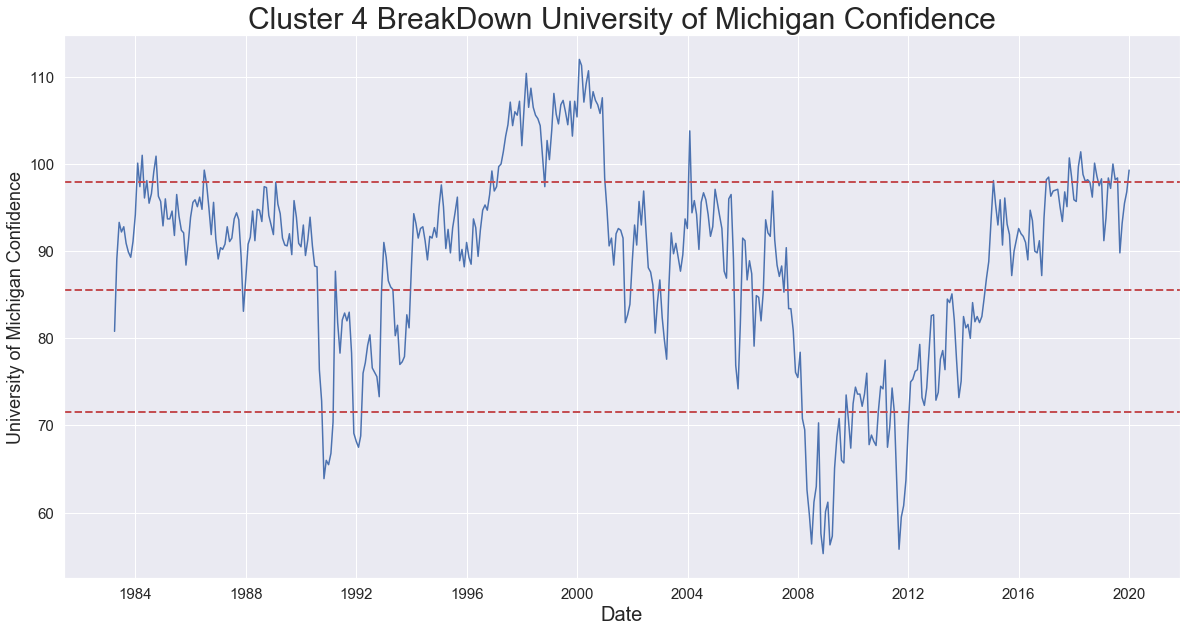

In [17]:
plt.figure(figsize = (20,10))
plt.plot(mic['Dates'], mic['University of Michigan Confidence'])
plt.axhline(71.6, color='r', linestyle='--',lw =2)
plt.axhline(85.6, color='r', linestyle='--',lw =2)
plt.axhline(97.9, color='r', linestyle='--',lw =2)
plt.title('Cluster 4 BreakDown University of Michigan Confidence', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('University of Michigan Confidence', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

### Cluster 3

In [18]:
kmeans33 = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
pred33 = kmeans33.fit_predict(X_scaled2)
mic['label_3'] = pred33
score = silhouette_score(X_scaled2, pred33, metric='euclidean', random_state = 0)
print('Silhouette:',score)

Silhouette: 0.5176245009684539


In [19]:
# range of clusters
mic.drop(['Dates','label_4'],axis=1).groupby('label_3').agg(['max', 'min'])

University of Michigan Confidence      
                                      max   min
label_3                                        
0                                    94.9  80.4
1                                   112.0  95.1
2                                    80.3  55.3

(array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120.]),
 <a list of 8 Text yticklabel objects>)

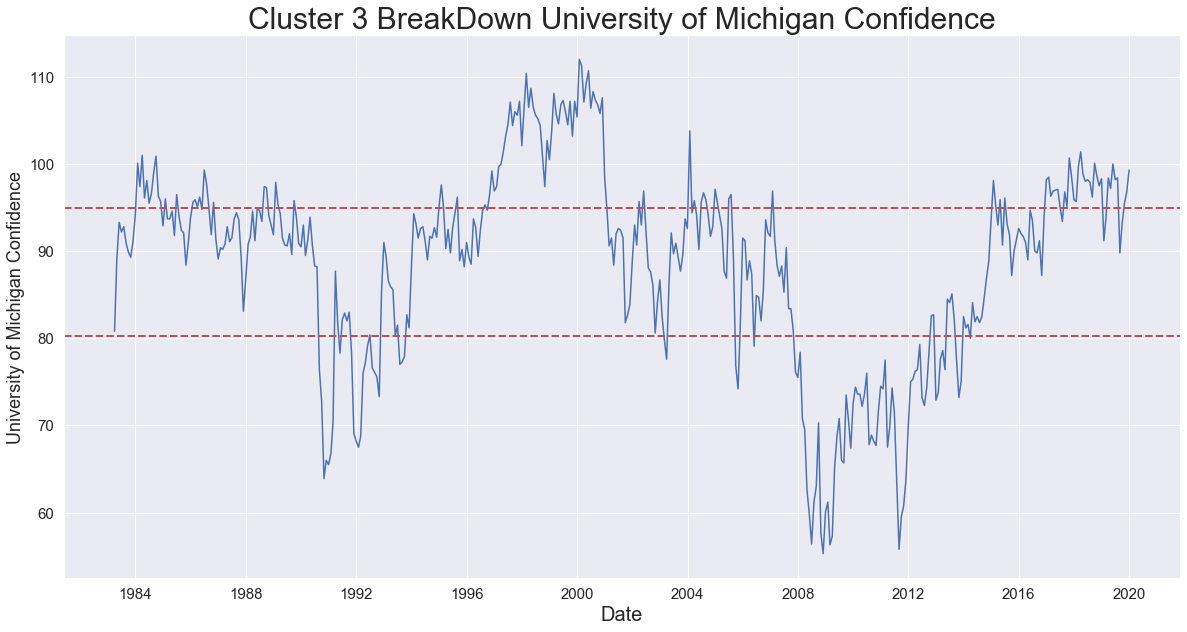

In [20]:
plt.figure(figsize = (20,10))
plt.plot(mic['Dates'], mic['University of Michigan Confidence'])
plt.axhline(80.3, color='r', linestyle='--',lw =2)
plt.axhline(94.9, color='r', linestyle='--',lw =2)
plt.title('Cluster 3 BreakDown University of Michigan Confidence', fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('University of Michigan Confidence', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [21]:
#mic.to_csv('Michigan_Confidence.csv')
#nfp.to_csv('Non_Farm_Payroll.csv')